In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

array([5, 0, 4, 1, 9], dtype=uint8)

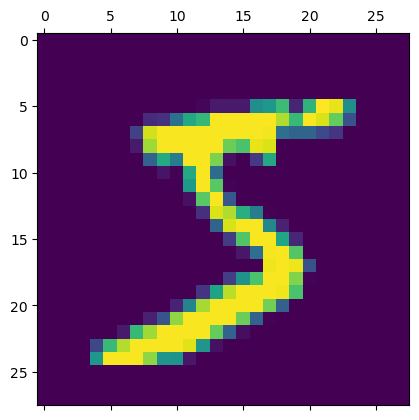

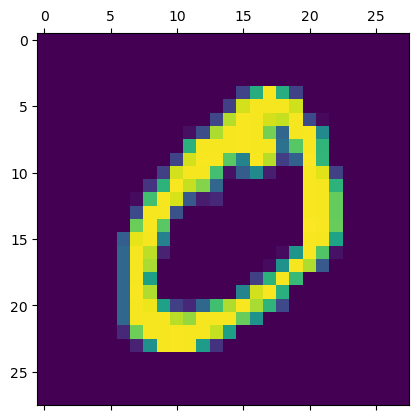

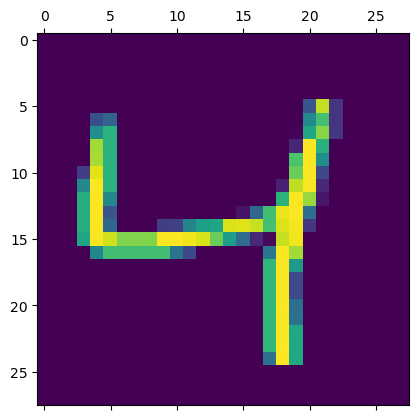

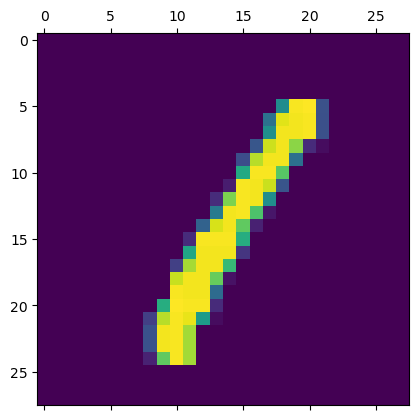

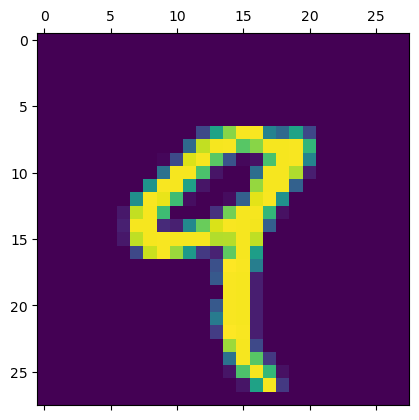

In [4]:
for i in range(5):
    plt.matshow(x_train[i])
y_train[0:5]

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train_flat = x_train.reshape(60000,28*28)/255
x_test_flat = x_test.reshape(10000,28*28)/255

In [7]:
x_train_flat.shape

(60000, 784)

In [8]:
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 774us/step - loss: 0.7832 - accuracy: 0.8138
Epoch 2/5
1875/1875 [==============================] - 1s 749us/step - loss: 0.4547 - accuracy: 0.8812
Epoch 3/5
1875/1875 [==============================] - 1s 715us/step - loss: 0.4021 - accuracy: 0.8917
Epoch 4/5
1875/1875 [==============================] - 1s 717us/step - loss: 0.3760 - accuracy: 0.8970
Epoch 5/5
1875/1875 [==============================] - 1s 720us/step - loss: 0.3595 - accuracy: 0.9009


In [10]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 674us/step - loss: 0.3365 - accuracy: 0.9075


[0.33648234605789185, 0.9075000286102295]

In [11]:
y_pred = model.predict(x_test_flat)

313/313 [==============================] - 0s 597us/step


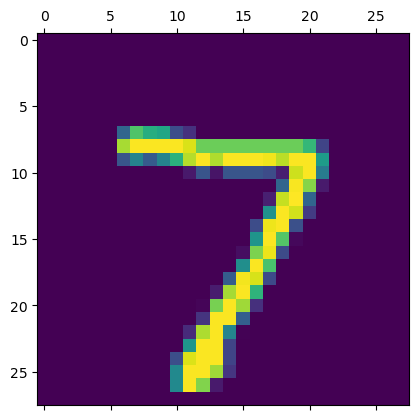

In [12]:
plt.matshow(x_test[0])

In [13]:
np.argmax(y_pred[0])              #np.argmax(arr) return index of max value in the array

7

In [14]:
first_ten = [np.argmax(arr) for arr in y_pred]
first_ten[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [15]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [16]:
conf_matrix = tf.math.confusion_matrix(y_test, first_ten)

In [17]:
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    3,    2,    0,    3,    8,    1,    4,    0],
       [   0, 1101,    2,    4,    1,    2,    4,    1,   20,    0],
       [  11,    5,  892,   15,   17,    1,   15,   21,   47,    8],
       [   6,    1,   15,  914,    1,   25,    3,   15,   21,    9],
       [   1,    5,    6,    0,  909,    1,   11,    1,    9,   39],
       [  13,    4,    3,   48,   14,  736,   16,   11,   39,    8],
       [  15,    3,    4,    3,   15,   13,  898,    1,    6,    0],
       [   3,   19,   24,    5,   10,    0,    0,  930,    3,   34],
       [   9,    8,    8,   22,    8,   20,   13,   19,  856,   11],
       [  11,    7,    5,   11,   46,   13,    0,   27,    9,  880]])>

Text(50.722222222222214, 0.5, 'Truth')

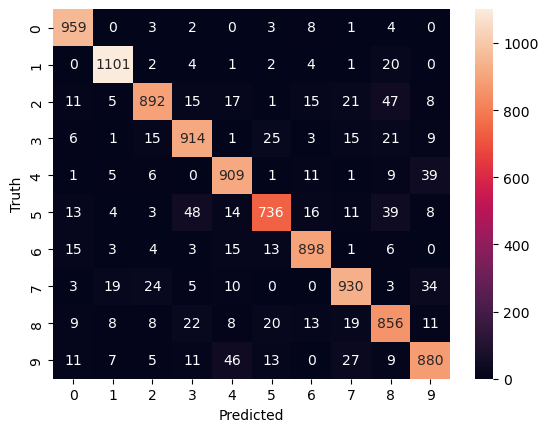

In [18]:
import seaborn as sn
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv("./CSVs/insurance.csv")
df.head(5)

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [4]:
a = df.iloc[[1,2,4]]
a

,age,affordibility,bought_insurance
1,25,0,0
2,47,1,1
4,46,1,1


In [5]:
a = df.iloc[1:3]
a

,age,affordibility,bought_insurance
1,25,0,0
2,47,1,1


In [7]:
a = df.iloc[:5,:]
a

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [11]:
a = df.iloc[:5,:1]
a

,age
0,22
1,25
2,47
3,52
4,46


In [13]:
a = df.iloc[:5,:2]
a

,age,affordibility
0,22,1
1,25,0
2,47,1
3,52,0
4,46,1


In [15]:
x = df.iloc[:,:-1]
x.head(5)

,age,affordibility
0,22,1
1,25,0
2,47,1
3,52,0
4,46,1


In [17]:
y = df.iloc[:,-1]
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: bought_insurance, dtype: int64